In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [2]:
import numpy as np#linear algebra
import pandas as pd#data processing csv file i/o
import matplotlib.pyplot as plt#data valuation
import seaborn as sns#statistical data valuation
%matplotlib inline

In [3]:
!pip install category_encoders
!pip install graphviz

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
from sklearn import tree

import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [5]:
data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df = pd.read_csv(data)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
#data processing and eda

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.shape

(1727, 7)

In [10]:
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())

buying
['vhigh' 'high' 'med' 'low']
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
['vhigh' 'high' 'med' 'low']
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
['2' '3' '4' '5more']
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
['2' '4' 'more']
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
['small' 'med' 'big']
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
['med' 'high' 'low']
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
['unacc' 'acc' 'vgood' 'good']
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


 class balanced or not

<Axes: ylabel='count'>

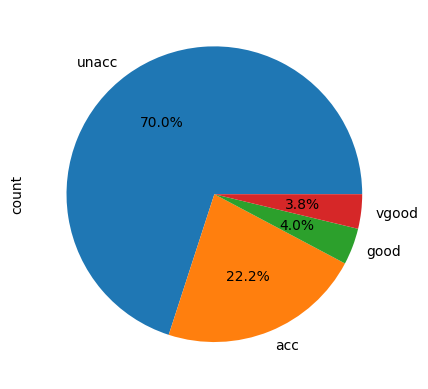

In [11]:
df['class'].value_counts().plot(kind = "pie",autopct='%1.1f%%')

class is imbalanced need to balance

In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
x = df.drop(['class'],axis=1)
y = df['class']

encoding data

In [14]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_en = encoder.fit_transform(x)

In [15]:
le = LabelEncoder()
y_en = le.fit_transform(y)

split the data into traning and testing

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_en,y_en,test_size = 0.33,random_state=42)

model traning

In [17]:
#instance the decisiontreeclassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)
#fit the model
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [18]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model accuracy score with ceiterion gini index:{0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

model accuracy score with ceiterion gini index:0.8053


In [19]:
cm = confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [20]:
classes_name = le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [21]:
cm_df=pd.DataFrame(cm,index=classes_name,columns = classes_name)
cm_df

,acc,good,unacc,vgood
acc,71,0,56,0
good,18,0,0,0
unacc,11,0,388,0
vgood,26,0,0,0


<Axes: >

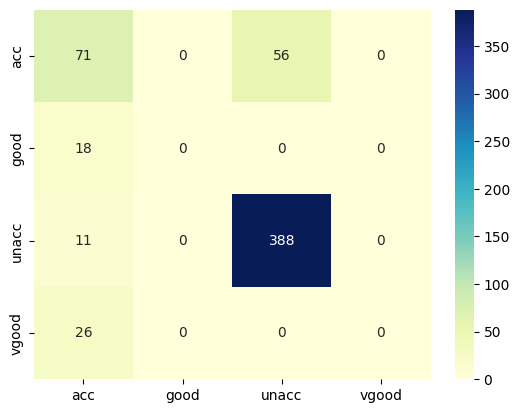

In [22]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [23]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       127
           1       0.00      0.00      0.00        18
           2       0.87      0.97      0.92       399
           3       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
x = df.drop(['class'],axis=1)
y = df['class']
ran=RandomUnderSampler()
x_rs,y_RandomOverSamplerrs = ran.fit_resample(x,y)

In [25]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_en = encoder.fit_transform(x_rs)

In [26]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_en = encoder.fit_transform(x_rs)

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_en,y_en,test_size = 0.33,random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [260, 1727]

In [ ]:
#instance the decisiontreeclassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)
#fit the model
clf_gini.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model accuracy score with ceiterion gini index:{0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

In [ ]:
cm = confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

<Axes: >

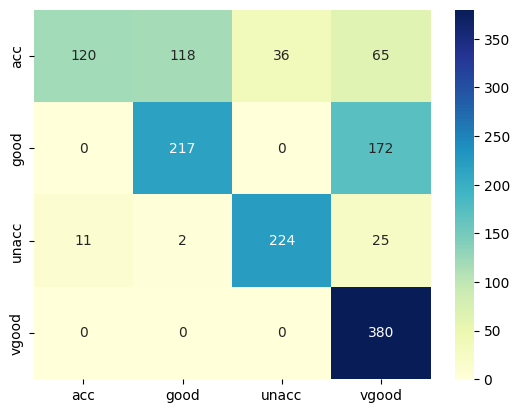

In [68]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [ ]:
print(classification_report(y_test,y_pred_gini))


In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
x = df.drop(['class'],axis=1)
y = df['class']
ran=RandomOverSampler()
x_rs,y_rs = ran.fit_resample(x,y)

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_en = encoder.fit_transform(x_rs)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_en,y_en,test_size = 0.33,random_state=42)

In [ ]:
#instance the decisiontreeclassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)
#fit the model
clf_gini.fit(x_train,y_train)

In [57]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model accuracy score with ceiterion gini index:{0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

model accuracy score with ceiterion gini index:0.6869


In [58]:
cm = confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[120 118  36  65]
 [  0 217   0 172]
 [ 11   2 224  25]
 [  0   0   0 380]]


In [59]:
cm_df=pd.DataFrame(cm,index=classes_name,columns = classes_name)
cm_df

,acc,good,unacc,vgood
acc,120,118,36,65
good,0,217,0,172
unacc,11,2,224,25
vgood,0,0,0,380


<Axes: >

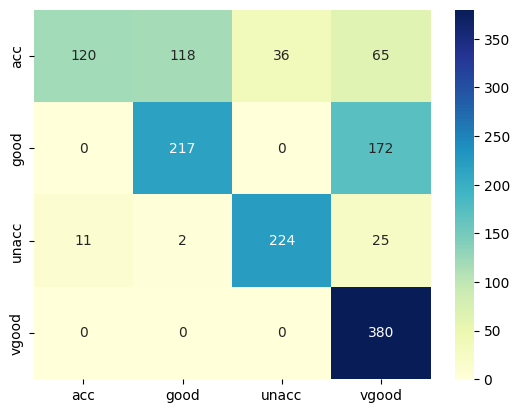

In [60]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')


In [61]:
print(classification_report(y_test,y_pred_gini))


              precision    recall  f1-score   support

           0       0.92      0.35      0.51       339
           1       0.64      0.56      0.60       389
           2       0.86      0.85      0.86       262
           3       0.59      1.00      0.74       380

    accuracy                           0.69      1370
   macro avg       0.75      0.69      0.68      1370
weighted avg       0.74      0.69      0.67      1370



In [46]:
from imblearn.combine import SMOTEENN
x = df.drop(['class'],axis=1)
y = df['class']
encoder =ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_en = encoder.fit_transform(x)
le = LabelEncoder()
y_en = le.fit_transform(y)

ran=SMOTEENN()
x_rs,y_rs=ran.fit_resample(x_en,y_en)


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_rs,y_rs,test_size = 0.33,random_state=42)

In [48]:
#instance the decisiontreeclassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=0)
#fit the model
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [49]:
y_pred_gini = clf_gini.predict(x_test)
print("model accuracy score with ceiterion gini index:{0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

model accuracy score with ceiterion gini index:0.6869


In [50]:
cm = confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[120 118  36  65]
 [  0 217   0 172]
 [ 11   2 224  25]
 [  0   0   0 380]]


In [51]:
cm_df=pd.DataFrame(cm,index=classes_name,columns = classes_name)
cm_df

,acc,good,unacc,vgood
acc,120,118,36,65
good,0,217,0,172
unacc,11,2,224,25
vgood,0,0,0,380


<Axes: >

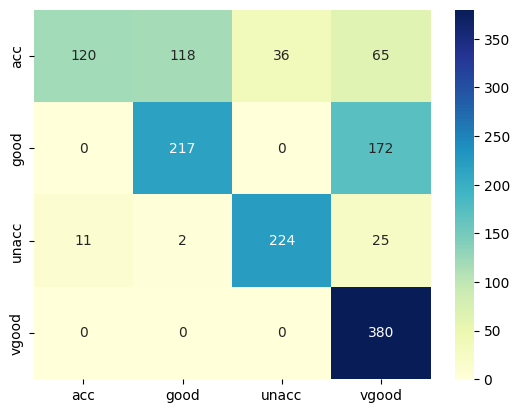

In [52]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')


In [53]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.35      0.51       339
           1       0.64      0.56      0.60       389
           2       0.86      0.85      0.86       262
           3       0.59      1.00      0.74       380

    accuracy                           0.69      1370
   macro avg       0.75      0.69      0.68      1370
weighted avg       0.74      0.69      0.67      1370



[Text(0.375, 0.875, 'x[3] <= 1.5\ngini = 0.746\nsamples = 2781\nvalue = [634, 757, 586, 804]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 332\nvalue = [0, 0, 332, 0]'),
 Text(0.5, 0.625, 'x[0] <= 2.5\ngini = 0.719\nsamples = 2449\nvalue = [634, 757, 254, 804]'),
 Text(0.25, 0.375, 'x[1] <= 2.5\ngini = 0.462\nsamples = 531\nvalue = [339, 0, 192, 0]'),
 Text(0.125, 0.125, 'gini = 0.411\nsamples = 218\nvalue = [63, 0, 155, 0]'),
 Text(0.375, 0.125, 'gini = 0.208\nsamples = 313\nvalue = [276, 0, 37, 0]'),
 Text(0.75, 0.375, 'x[5] <= 1.5\ngini = 0.644\nsamples = 1918\nvalue = [295, 757, 62, 804]'),
 Text(0.625, 0.125, 'gini = 0.425\nsamples = 654\nvalue = [185, 460, 9, 0]'),
 Text(0.875, 0.125, 'gini = 0.531\nsamples = 1264\nvalue = [110, 297, 53, 804]')]

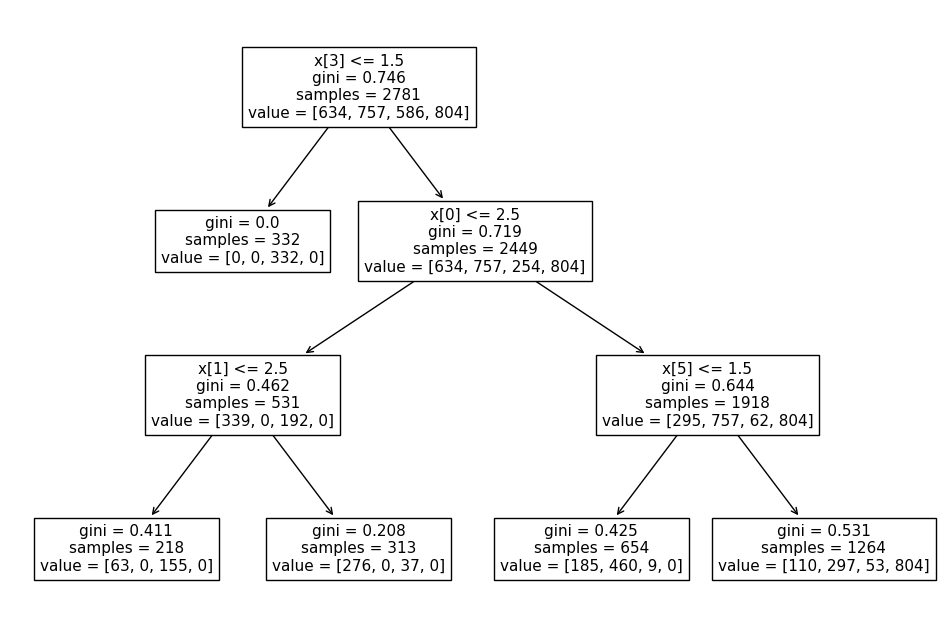

In [54]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train,y_train))

In [55]:
import graphviz
dot_data = tree.export_graphviz(clf_gini,out_file=None,feature_names=x_train.columns,class_names=classes_name,filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

In [64]:
from sklearn.model_selection import GridSearchCV


params = {'max_depth': [2, 3, 5, 6,8,10, 20], 'min_samples_leaf': [5, 10, 20, 50, 100], 'criterion': ["gini", "entropy"] }

In [65]:
grid_search = GridSearchCV(estimator=clf_gini,param_grid=params,cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [66]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 70 candidates, totalling 280 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [72]:
best_par = grid_search.best_estimator_

In [83]:
def evaluate_model(dt_classifier):
    print("Train Accuracy:",accuracy_score(y_train, dt_classifier.predict(x_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))
     print("-"*50)
    print("Test Accuracy:",accuracy_score(y_test, dt_classifier.predict(x_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(x_test)))
    
    cm_df = pd.DataFrame(cm, index = classes_name,columns = classes_name)
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
    print(classification_report(y_test, dt_classifier.predict(x_test)))

Train Accuracy: 0.9913700107874865
Train Confusion Matrix:
[[620  10   3   1]
 [  0 757   0   0]
 [ 10   0 576   0]
 [  0   0   0 804]]
--------------------------------------------------
Test Accuracy: 0.9824817518248176
Test Confusion Matrix:
[[323  11   5   0]
 [  3 386   0   0]
 [  5   0 257   0]
 [  0   0   0 380]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       339
           1       0.97      0.99      0.98       389
           2       0.98      0.98      0.98       262
           3       1.00      1.00      1.00       380

    accuracy                           0.98      1370
   macro avg       0.98      0.98      0.98      1370
weighted avg       0.98      0.98      0.98      1370



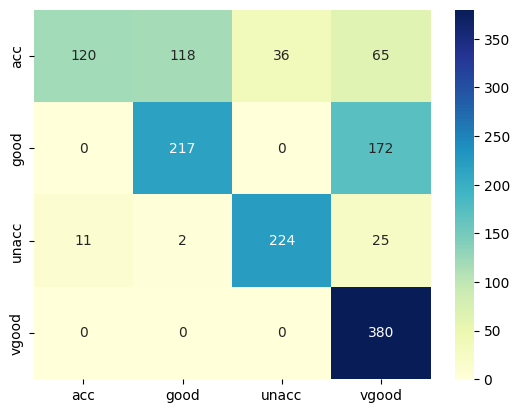

In [84]:
evaluate_model(best_par)

In [85]:
best_par.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5,
                       random_state=0)

In [86]:
print("Test Accuracy:",accuracy_score(y_test, best_par.predict(x_test)))

Test Accuracy: 0.9824817518248176


In [87]:
import joblib
filename = 'finalized_model.joblib'
joblib.dump(best_par,filename)

['finalized_model.joblib']

In [88]:
from IPython.display import FileLink
FileLink(r'finalized_model.joblib')

/kaggle/working/finalized_model.joblib